<a href="https://colab.research.google.com/github/Yuninggao/Yuning_some_random_string-IDS/blob/main/hw6/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# combine py and r
%load_ext rpy2.ipython


In [7]:
# install package of caret and randomForest

%%R

install.packages("caret", dependencies = TRUE)
install.packages("randomForest")

Streaming output truncated to the last 5000 lines.

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ParamHelpers_1.14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 123633 bytes (120 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [12]:
# import training and test dataframe

%%R

library(readr)
library(caret)
library(randomForest)

trainingDF <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv")
testDF <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv")


In [58]:
# install package rpart and rpart.plot

%%R

install.packages("rpart")
install.packages("rpart.plot")

library(rpart)
library(rpart.plot)






R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart_4.1.16.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 859107 bytes (838 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [22]:
#describe the training dataframe

%%R

str(trainingDF)






'data.frame':	150302 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  397 403 408 408 411 413 416 421 422 432 ...
 $ Request.Amount      : int  1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num  450 225 450 900 2250 2250 2700 900 5400 4500 ...


In [23]:
#show head traing dataframe

%%R

head(trainingDF)

  Approval Debt.to.Income.Ratio FICO.Score Request.Amount Interest
1    FALSE                    0        397           1000      450
2    FALSE                    0        403            500      225
3    FALSE                    0        408           1000      450
4    FALSE                    0        408           2000      900
5    FALSE                    0        411           5000     2250
6    FALSE                    0        413           5000     2250


In [168]:
# create cart model using trainingDF

%%R

m.cart<-rpart(Approval ~., data=trainingDF, method="class",  parms=list( split="gini" )) 

printcp(m.cart)



Classification tree:
rpart(formula = Approval ~ ., data = trainingDF, method = "class", 
    parms = list(split = "gini"))

Variables actually used in tree construction:
[1] Debt.to.Income.Ratio FICO.Score          

Root node error: 75066/150302 = 0.49943

n= 150302 

       CP nsplit rel error  xerror      xstd
1 0.56465      0   1.00000 1.00229 0.0025823
2 0.12676      1   0.43535 0.43535 0.0021304
3 0.01000      2   0.30860 0.31002 0.0018683


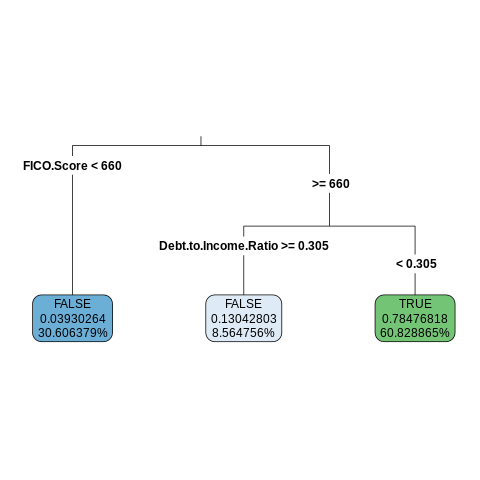

In [138]:
# plot cart model

%%R

rpart.plot(m.cart, type=3, digits=15,fallen.leaves=TRUE)

In [139]:
# predict cart model

%%R
predict_c <- predict(m.cart,testDF, 'class')
head(predict_c)

    1     2     3     4     5     6 
FALSE FALSE FALSE FALSE FALSE FALSE 
Levels: FALSE TRUE


In [142]:
# count the accuracy of model cart
%%R
accuracy_c <- sum( predict_c == testDF$Approval)/ length(predict_c)
print('the accuracy of model cart is ')
accuracy_c * 100

[1] "the accuracy of model cart is "
[1] 84.32331


In [164]:
# summary cart model

%%R

summary(m.cart)




Call:
rpart(formula = Approval ~ ., data = trainingDF, method = "class", 
    parms = list(split = "gini"))
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0033304 0.002582308
2 0.1267551      1 0.4353502 0.4353769 0.002130440
3 0.0100000      2 0.3085951 0.3091679 0.001866189

Variable importance
          FICO.Score Debt.to.Income.Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request.Amount       < 25500 to the right, improve= 1191.854, (0 missing)
      Interest             < 11475 to the right, improve= 1191.854, (0

In [95]:
# install pacage c50 

%%R


install.packages("C50")
library(C50)










R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/C50_0.1.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 305528 bytes (298 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [115]:
# the target of Approval as a factor

%%R
trainingDF$Approval = as.factor(trainingDF$Approval)
head(trainingDF$Approval)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE


In [166]:
#create c50 model using trainingDF and limit the minimum cases is 1000

%%R



mc50 <- C5.0(trainingDF[, -1], trainingDF$Approval,control = C5.0Control(minCases=1000))

mc50
 


Call:
C5.0.default(x = trainingDF[, -1], y = trainingDF$Approval, control
 = C5.0Control(minCases = 1000))

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Tree size: 8 

Non-standard options: attempt to group attributes, minimum number of cases: 1000



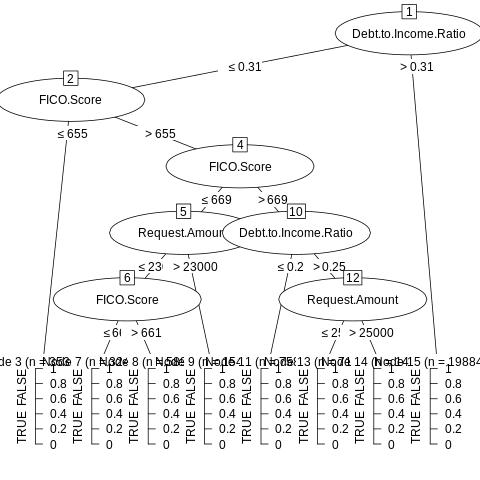

In [167]:
#plot c50 model

%%R


plot(mc50)


In [143]:
#predict c50 model

%%R

predict_c50 <- predict(mc50, testDF)
head(predict_c50)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE


In [152]:
#count the accuracy of c50 model
%%R
accuracy_c50 <- sum( predict_c50 ==testDF$Approval)/ length(predict_c50)
print(' the accuracy of model c50 is ')
accuracy_c50 * 100



[1] "the accuracy of model c50 is "
[1] 84.71568


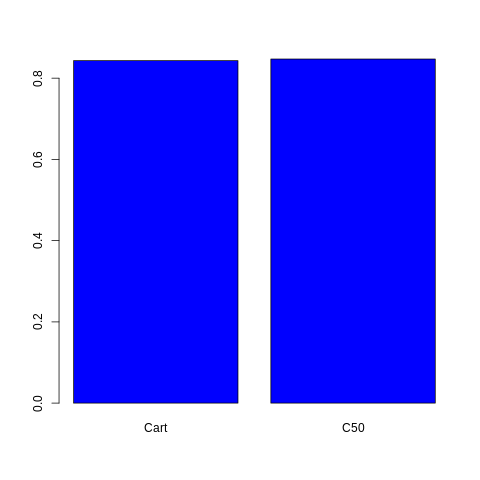

In [163]:
# compare the model of cart and c50
%%R
labels <- c('Cart', 'C50')
accuracy_model = c(accuracy_c, accuracy_c50)

barplot(accuracy_model,   names.arg = labels, col="blue")

summary:


The accuracy of the model cart is 84.32, while the accuracy of the model c50 is 84.72. in addition base on the cart model plot we can know when fico score is less than 660, it will be false, when fico score is greater than or equal to 660 and debt income is more than or equal to 0.305, it will be false.
when fico score is greater than or equal to 660 and debt income is less than 0.305 it will be true.